# COMPRESSION ALGORITHMS

Contributors:

Severyn Shykula LZ77, Huffman, Deflate

Yulia Polysutok LZW, Deflate



In [23]:
import time
import matplotlib.pyplot as plt

# IMPLEMENTATIONS

We will start with our implementations of algorithms:

All classes have encode and decode feature

LZ77 Algorithm


In [24]:
class LZ77:
    def __init__(self,text,buffer_len):
        self.text = text
        self.buffer_len = buffer_len
    def encode(self,text=None):
        if text:
            self.text = text
        current = 0
        buffer = []
        compressed = []
        while current < len(self.text):
            current_symbol = self.text[current]
            if current > 5:
                buffer = self.text[current-self.buffer_len:current]
            else:
                buffer = self.text[0:current]
            if current_symbol in buffer:
                offset, length = self.find_best(self.text,current_symbol,current,buffer)
                if current+length < len(self.text):
                    compressed.append((offset, length, self.text[current+length]))
                else:
                    compressed.append((offset, length, ''))                  
                current = current+length+1
            else:
                compressed.append((0,0,current_symbol))
                current += 1
        self.text = compressed
        return compressed

    def decode(self,text=None):
        if text:
            self.text = text
        str_buff = ''
        new = ''
        for elem in self.text:
            if len(new)>self.buffer_len:
                str_buff = new[len(new)-self.buffer_len:]
            else:
                str_buff = new
            if elem[1] == 0:
                new += elem[2]
            else:
                check = str_buff[len(str_buff) - elem[0]:]
                for i in range(elem[1]):
                    new += check[i%len(check)]
                new += elem[2]
        self.text = new
        return new

    def find_best(self, text, current_symbol, current, buffer):
        possible_offset = []
        best_len = 0
        best_offset = 0
        for i in range(len(buffer)):
            if buffer[i] == current_symbol:
                possible_offset.append(len(buffer)-i)
        for offset in possible_offset:
            check = buffer[len(buffer) - offset:]
            i = 1
            while True:
                if current+i >= len(text):
                    break
                if check[i%len(check)] == text[current + i]:
                    i+=1
                else:
                    break
            if i > best_len:
                best_len = i
                best_offset = offset
        return best_offset, best_len

LZW


In [25]:
class LZW:
    def __init__(self, text):
        self.text = text
    def encode(self,text=None):
        if text:
            self.text = text
        coded = []
        help_dict = {chr(i):i for i in range(256)}
        #help dict starts with all ASCII
        #first step
        current = self.text[0]
        i = 1
        while i < len(self.text) + 1:
            if i != len(self.text):
                next = self.text[i]
            else:
                next='/end'
            if current + next in help_dict:
                current += next
                i+=1
            else:
                help_dict[current+next] = len(help_dict)
                coded += [help_dict[current]]
                current = next
                i += 1
        self.text = coded
        return self.text
    def decode(self,text=None):
        if text:
            self.text = text
        decoded = ''
        help_dict = {i:chr(i) for i in range(256)}
        for pos, elem in enumerate(self.text):
                decoded += str(help_dict[elem])
                if pos != len(self.text) - 1:
                    if len(help_dict) == self.text[pos+1]:
                        help_dict[len(help_dict)] = help_dict[elem] + help_dict[elem][0]
                    else:
                        help_dict[len(help_dict)] = help_dict[elem] + help_dict[self.text[pos+1]][0]
        self.text = decoded
        return decoded

Huffman


In [26]:
class Huffman:
    def __init__(self, text):
        self.text = text
    def encode(self,text=None):
        if text:
            self.text = text
        values = {}
        for elem in self.text:
            if elem in values:
                values[elem]+=1
            else:
                values[elem]=1
        codes = []
        for item in values.items():
            codes.append(Node(item[1],item[0]))
        codes.sort(key = lambda x: x.p, reverse=True)
        for i in range(len(codes)-1):
            elem_1 = codes.pop()
            elem_2 = codes.pop()
            new = Node(elem_1.p+elem_2.p,'')
            new.kids = [elem_1,elem_2]
            elem_1.parent = new
            elem_2.parent = new
            k=0
            for i in range(len(codes)):
                if codes[i].p >= new.p:
                    continue
                else:
                    codes.insert(i,new)
                    k=1
                    break
            if k==0:
                codes.append(new)
        elem = codes[0]
        code=''
        codes = {}
        codes = self.traverse(elem, '',codes)
        self.codes = codes
        coded = ''
        for elem in self.text:
            coded += codes[elem]
        self.text = coded
        return coded

    def decode(self,text=None):
        if text:
            self.text = text
        i=0
        real = ''
        reverse = {v:k for k,v in self.codes.items()}
        while i < len(self.text):
            iter = 1
            while True:
                if self.text[i:i+iter] in reverse:
                    real += reverse[self.text[i:i+iter]]
                    i+=iter
                    break
                else:
                    iter += 1
        self.text = real
        return real

    def traverse(self,elem,code,codes):
        if elem.kids!=None:
            return self.traverse(elem.kids[0], code+'0',codes) | self.traverse(elem.kids[1], code+'1',codes)
        else:
            codes[elem.sign] = code
            return codes
class Node:
    def __init__(self,p,sign):
        self.p = p
        self.parent = None
        self.kids = None
        self.sign = sign

Deflate

In [27]:
class Deflate:
    def __init__(self, text, buffer_len):
        self.buffer_len = buffer_len
        self.text = text
    def encode(self,text=None):
        if text:
            self.text = text
        current = 0
        buffer = []
        compressed = []
        while current < len(self.text):
            current_symbol = self.text[current]
            if current > 5:
                buffer = self.text[current-self.buffer_len:current]
            else:
                buffer = self.text[0:current]
            if current_symbol in buffer:
                offset, length = self.find_best(self.text,current_symbol,current,buffer)
                if current+length < len(self.text):
                    compressed.append((offset, length, self.text[current+length]))
                else:
                    compressed.append((offset, length, ''))                  
                current = current+length+1
            else:
                compressed.append((0,0,current_symbol))
                current += 1
        self.text = compressed
        values = {}
        for elem_tuple in self.text:
            for elem in elem_tuple:
                if elem in values:
                    values[elem]+=1
                else:
                    values[elem]=1
        codes = []
        for item in values.items():
            codes.append(Node(item[1],item[0]))
        codes.sort(key = lambda x: x.p, reverse=True)
        for i in range(len(codes)-1):
            elem_1 = codes.pop()
            elem_2 = codes.pop()
            new = Node(elem_1.p+elem_2.p,'')
            new.kids = [elem_1,elem_2]
            elem_1.parent = new
            elem_2.parent = new
            k=0
            for i in range(len(codes)):
                if codes[i].p >= new.p:
                    continue
                else:
                    codes.insert(i,new)
                    k=1
                    break
            if k==0:
                codes.append(new)
        elem = codes[0]
        code=''
        codes = {}
        codes = self.traverse(elem, '',codes)
        self.codes = codes 
        coded = ''
        for elem in self.text:
            if elem[2]!= '':
                coded += codes[elem[0]]+codes[elem[1]]+codes[elem[2]]
            else:
                coded += codes[elem[0]]+codes[elem[1]]
        self.text = coded
        return coded
    def traverse(self,elem,code,codes):
        if elem.kids!=None:
            return self.traverse(elem.kids[0], code+'0',codes) | self.traverse(elem.kids[1], code+'1',codes)
        else:
            codes[elem.sign] = code
            return codes
    def find_best(self, text, current_symbol, current, buffer):
        possible_offset = []
        best_len = 0
        best_offset = 0
        for i in range(len(buffer)):
            if buffer[i] == current_symbol:
                possible_offset.append(len(buffer)-i)
        for offset in possible_offset:
            check = buffer[len(buffer) - offset:]
            i = 1
            while True:
                if current+i >= len(text):
                    break
                if check[i%len(check)] == text[current + i]:
                    i+=1
                else:
                    break
            if i > best_len:
                best_len = i
                best_offset = offset
        return best_offset, best_len
    def decode(self,text=None):
        if text:
            self.text = text
        i=0
        real = []
        reverse = {v:k for k,v in self.codes.items()}
        while i < len(self.text):
            iter = 1
            while True:
                if self.text[i:i+iter] in reverse:
                    real.append(reverse[self.text[i:i+iter]])
                    i+=iter
                    break
                else:
                    iter += 1
        tuples=[]
        for i in range(len(real)//3):
            tuples.append((real[3*i],real[3*i+1],real[3*i+2]))
        last = []
        for i in range(3*(len(real)//3),len(real)):
            last.append(real[i])
        if last != []:
            if len(last) == 2:
                last.append('')
            tuples.append(tuple(last))
        str_buff = ''
        new = ''
        for elem in tuples:
            if len(new)>self.buffer_len:
                str_buff = new[len(new)-self.buffer_len:]
            else:
                str_buff = new
            if elem[1] == 0:
                new += elem[2]
            else:
                check = str_buff[len(str_buff) - elem[0]:]
                for i in range(elem[1]):
                    new += check[i%len(check)]
                new += elem[2]
        self.text = new
        return new
class Node:
    def __init__(self,p,sign):
        self.p = p
        self.parent = None
        self.kids = None
        self.sign = sign

# ANALYSIS

Now we will analyse those algorithms

We will begin with LZ77 and buffer length optimization

We will test on Drive script data

In [28]:
with open('drive.txt','r') as file:
    raw_file = file.read()

Text(0, 0.5, 'Compression ratio, %')

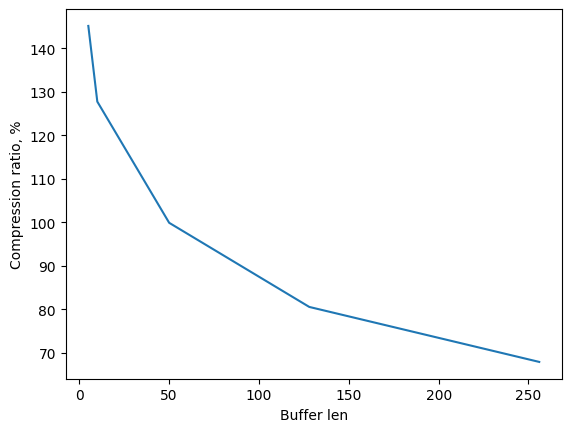

In [29]:
len_list = []
buffer_pos = [5,10,50,128,256]
for buffer in buffer_pos:
    obj = LZ77(raw_file, buffer)
    len_list.append(100*3*len(obj.encode())/len(raw_file))
    assert obj.decode() == raw_file
plt.figure()
plt.plot(buffer_pos, len_list, '-')
plt.xlabel('Buffer len')
plt.ylabel('Compression ratio, %')

Text(0, 0.5, 'Time used, s')

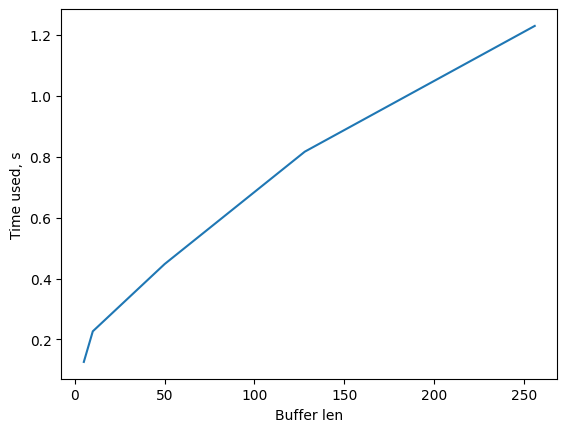

In [30]:
time_list = []
for buffer in buffer_pos:
    time_1 = time.time()
    obj = LZ77(raw_file, buffer)
    obj.encode()
    time_2 = time.time()
    time_list.append(time_2-time_1)
    assert obj.decode() == raw_file
plt.figure()
plt.plot(buffer_pos, time_list, '-')
plt.xlabel('Buffer len')
plt.ylabel('Time used, s')

As we can see with a growth of buffer LZ77 works much better (when buffer len is small it can't even compress).

 But on the other hand time used for encoding also growth a lot. But we will use 256 just because its still 8 bit (1 byte) and there is no need to test algorithm if it doesn't even compress

# General testing

So we will begin with compression testing

On the plot you can see |compressed length / raw length| against length of raw text

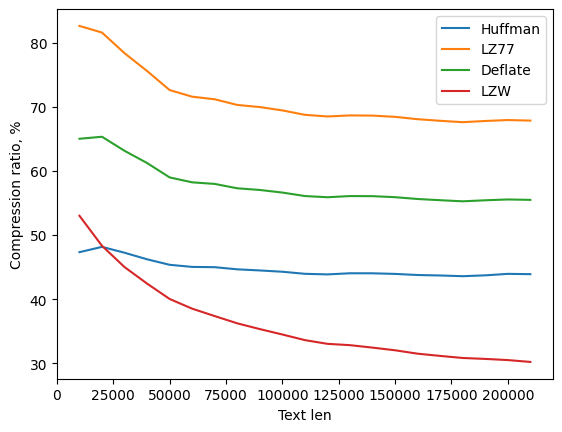

In [31]:
num = range(10000,len(raw_file),10000)
len_list_huf = []
len_list_77 = []
len_list_lzw = []
len_list_deflate = []
for elem in num:
    obj = Huffman(raw_file[:elem])
    len_list_huf.append(100*(len(obj.encode())/8)/(elem))
    obj = LZ77(raw_file[:elem],256)
    len_list_77.append(100*(3*len(obj.encode()))/(elem))
    obj = LZW(raw_file[:elem])
    #special
    text = obj.encode()
    s_len = 0
    import math
    for elem_1 in text:
        if elem_1 < 256:
            s_len += 1
        elif elem_1 < 256*256:
            s_len += 2
        else:
            s_len += 3
    len_list_lzw.append(100*(s_len)/(elem))
    obj = Deflate(raw_file[:elem],256)
    len_list_deflate.append(100*(len(obj.encode())/8)/(elem))
plt.figure()
plt.plot(num, len_list_huf, '-',num, len_list_77, '-',num, len_list_deflate, '-',num, len_list_lzw, '-')
plt.xlabel('Text len')
plt.ylabel('Compression ratio, %')
plt.legend(['Huffman','LZ77','Deflate','LZW'])

As we can see LZW is compressing the best and it scales with length of text. Huffman is quite good at all lengths. LZ77 and Deflate are mediocre.

Now we will test time used for encoding

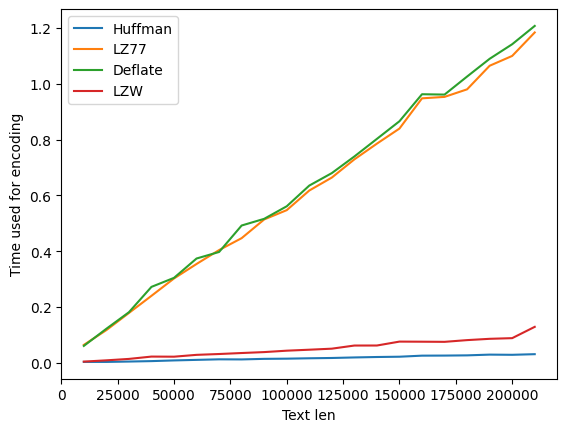

In [32]:
num = range(10000,len(raw_file),10000)
len_list_huf = []
len_list_77 = []
len_list_lzw = []
len_list_deflate = []
for elem in num:
    obj = Huffman(raw_file[:elem])
    time_1 = time.time()
    obj.encode()
    time_2 = time.time()
    len_list_huf.append(time_2 - time_1)
    obj = LZ77(raw_file[:elem],256)
    time_1 = time.time()
    obj.encode()
    time_2 = time.time()
    len_list_77.append(time_2 - time_1)
    obj = LZW(raw_file[:elem])
    time_1 = time.time()
    obj.encode()
    time_2 = time.time()
    len_list_lzw.append(time_2 - time_1)
    obj = Deflate(raw_file[:elem],256)
    time_1 = time.time()
    obj.encode()
    time_2 = time.time()
    len_list_deflate.append(time_2 - time_1)
plt.figure()
plt.plot(num, len_list_huf, '-',num, len_list_77, '-',num, len_list_deflate, '-',num, len_list_lzw, '-')
plt.xlabel('Text len')
plt.ylabel('Time used for encoding')
plt.legend(['Huffman','LZ77','Deflate','LZW'])


As we can see Huffman in the fastest algorithm to encode. LZW is second best. Deflate and LZ77 are mediocre

Now we will test decoding time

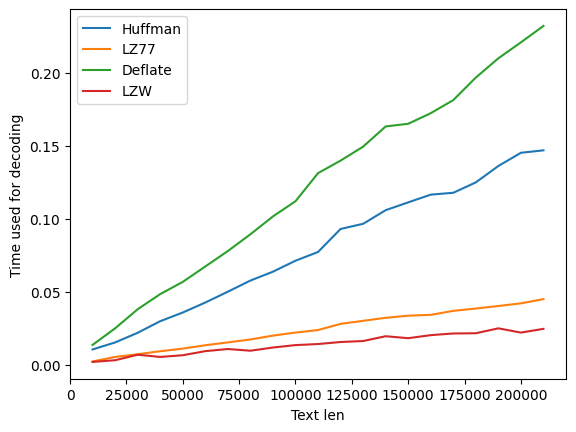

In [33]:
num = range(10000,len(raw_file),10000)
len_list_huf = []
len_list_77 = []
len_list_lzw = []
len_list_deflate = []
for elem in num:
    obj = Huffman(raw_file[:elem])
    obj.encode()
    time_1 = time.time()
    assert obj.decode() == raw_file[:elem]
    time_2 = time.time()
    len_list_huf.append(time_2 - time_1)
    obj = LZ77(raw_file[:elem],256)
    obj.encode()
    time_1 = time.time()
    assert obj.decode() == raw_file[:elem]
    time_2 = time.time()
    len_list_77.append(time_2 - time_1)
    obj = LZW(raw_file[:elem])
    obj.encode()
    time_1 = time.time()
    assert obj.decode() == raw_file[:elem]
    time_2 = time.time()
    len_list_lzw.append(time_2 - time_1)
    obj = Deflate(raw_file[:elem],256)
    obj.encode()
    time_1 = time.time()
    assert obj.decode() == raw_file[:elem]
    time_2 = time.time()
    len_list_deflate.append(time_2 - time_1)
plt.figure()
plt.plot(num, len_list_huf, '-',num, len_list_77, '-',num, len_list_deflate, '-',num, len_list_lzw, '-')
plt.xlabel('Text len')
plt.ylabel('Time used for decoding')
plt.legend(['Huffman','LZ77','Deflate','LZW'])

As we can see LZW and LZ77 are the best at fast decoding. Huffman and Deflate are mediocre here.

Now we will test some specific files and we will begin with html file

In [34]:
with open('a.html','r') as file:
    raw_file = file.read()

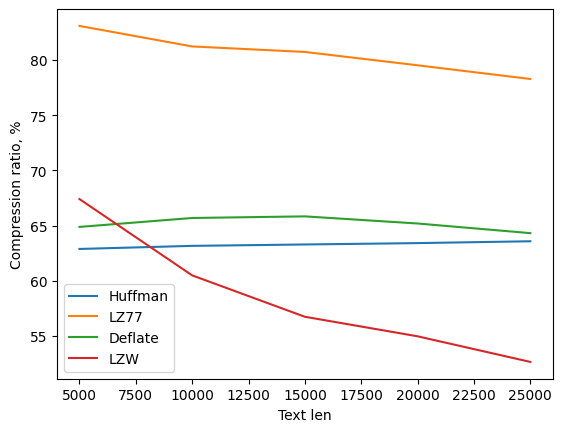

In [35]:
num = range(5000,len(raw_file),5000)
len_list_huf = []
len_list_77 = []
len_list_lzw = []
len_list_deflate = []
for elem in num:
    obj = Huffman(raw_file[:elem])
    len_list_huf.append(100*(len(obj.encode())/8)/(elem))
    obj = LZ77(raw_file[:elem],256)
    len_list_77.append(100*(3*len(obj.encode()))/(elem))
    obj = LZW(raw_file[:elem])
    #special
    text = obj.encode()
    s_len = 0
    import math
    for elem_1 in text:
        if elem_1 < 256:
            s_len += 1
        elif elem_1 < 256*256:
            s_len += 2
        else:
            s_len += 3
    len_list_lzw.append(100*(s_len)/(elem))
    obj = Deflate(raw_file[:elem],256)
    len_list_deflate.append(100*(len(obj.encode())/8)/(elem))
plt.figure()
plt.plot(num, len_list_huf, '-',num, len_list_77, '-',num, len_list_deflate, '-',num, len_list_lzw, '-')
plt.xlabel('Text len')
plt.ylabel('Compression ratio, %')
plt.legend(['Huffman','LZ77','Deflate','LZW'])

As we can see for small html files Huffman is best, but for big ones LZW wins. LZ77 is quite bad

Now we will test on cyclic data

In [36]:
with open('cyclic.txt','r') as file:
    raw_file = file.read()

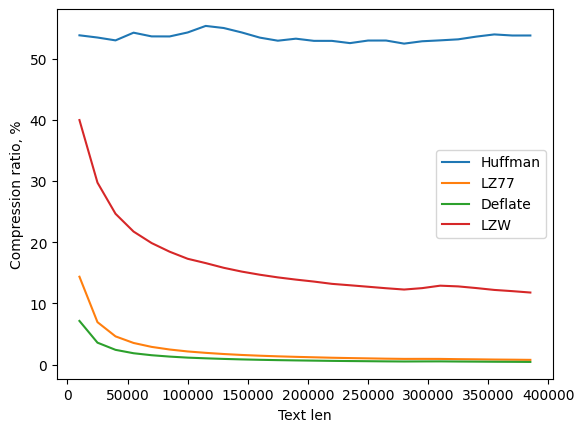

In [37]:
num = range(10000,len(raw_file),15000)
len_list_huf = []
len_list_77 = []
len_list_lzw = []
len_list_deflate = []
for elem in num:
    obj = Huffman(raw_file[:elem])
    len_list_huf.append(100*(len(obj.encode())/8)/(elem))
    obj = LZ77(raw_file[:elem],256)
    len_list_77.append(100*(3*len(obj.encode()))/(elem))
    obj = LZW(raw_file[:elem])
    #special
    text = obj.encode()
    s_len = 0
    import math
    for elem_1 in text:
        if elem_1 < 256:
            s_len += 1
        elif elem_1 < 256*256:
            s_len += 2
        else:
            s_len += 3
    len_list_lzw.append(100*(s_len)/(elem))
    obj = Deflate(raw_file[:elem],256)
    len_list_deflate.append(100*(len(obj.encode())/8)/(elem))
plt.figure()
plt.plot(num, len_list_huf, '-',num, len_list_77, '-',num, len_list_deflate, '-',num, len_list_lzw, '-')
plt.xlabel('Text len')
plt.ylabel('Compression ratio, %')
plt.legend(['Huffman','LZ77','Deflate','LZW'])

As we can see Deflate is the best here and LZ77 is really close to it. Huffman is bad now and LZW is mediocre.

To make the best out of:

Deflate - better use it on cyclic data or html files, can be better with bigger buffer but that will lead to enormous executing time

LZ 77 - better use it on cyclic data, better be used when decoding time really matters

LZW - don't use on cyclic data, better be used on large files. Good when decoding + encoding times matters

Huffman - don't use on cyclic data, good at small files. Use when encoding time matters. Don't use when decoding time matters.

# CONCLUSION

So, all in all:

If you work with large files  - better use LZW

If you work with small files - better use Huffman

If you need small decoding time - better use LZW/ LZ77

If you need small encoding time - better use Huffman / LZW

If you work with cyclic data - better use Deflate / LZ77

If you work with small html files - better use Huffman

If you work with big html files - better use LZW